In [1]:
import pandas as pd
from prophet import Prophet 

In [2]:
df = pd.read_csv("/Users/rohansingh/Jupyter Notebooks/Data/LamarJackson.csv")
df.head()

,Rk,Year,Date,G#,Week,Age,Tm,Unnamed: 7,Opp,Result,...,FR,Yds.3,TD.3,Num,Pct,Num.1,Pct.1,Num.2,Pct.2,Status
0,17,2019,9/8/19,1,1,22.244,BAL,@,MIA,W 59-10,...,0,0.0,0.0,53.0,70%,0.0,0%,0.0,0%,NaN
1,18,2019,9/15/19,2,2,22.251,BAL,NaN,ARI,W 23-17,...,0,0.0,0.0,77.0,100%,0.0,0%,0.0,0%,NaN
2,19,2019,9/22/19,3,3,22.258,BAL,@,KAN,L 28-33,...,0,0.0,0.0,82.0,100%,0.0,0%,0.0,0%,NaN
3,20,2019,9/29/19,4,4,22.265,BAL,NaN,CLE,L 25-40,...,0,-3.0,0.0,69.0,100%,0.0,0%,0.0,0%,NaN
4,21,2019,10/6/19,5,5,22.272,BAL,@,PIT,W 26-23,...,1,0.0,0.0,79.0,100%,0.0,0%,0.0,0%,NaN


In [3]:
df_copy = pd.read_csv("/Users/rohansingh/Jupyter Notebooks/Data/LamarJackson.csv")
df_copy.head()

,Rk,Year,Date,G#,Week,Age,Tm,Unnamed: 7,Opp,Result,...,FR,Yds.3,TD.3,Num,Pct,Num.1,Pct.1,Num.2,Pct.2,Status
0,17,2019,9/8/19,1,1,22.244,BAL,@,MIA,W 59-10,...,0,0.0,0.0,53.0,70%,0.0,0%,0.0,0%,NaN
1,18,2019,9/15/19,2,2,22.251,BAL,NaN,ARI,W 23-17,...,0,0.0,0.0,77.0,100%,0.0,0%,0.0,0%,NaN
2,19,2019,9/22/19,3,3,22.258,BAL,@,KAN,L 28-33,...,0,0.0,0.0,82.0,100%,0.0,0%,0.0,0%,NaN
3,20,2019,9/29/19,4,4,22.265,BAL,NaN,CLE,L 25-40,...,0,-3.0,0.0,69.0,100%,0.0,0%,0.0,0%,NaN
4,21,2019,10/6/19,5,5,22.272,BAL,@,PIT,W 26-23,...,1,0.0,0.0,79.0,100%,0.0,0%,0.0,0%,NaN


In [4]:
passer_rating_df = df[["Date","Rate"]]
passer_rating_df.head()

,Date,Rate
0,9/8/19,158.3
1,9/15/19,104.8
2,9/22/19,70.6
3,9/29/19,96.1
4,10/6/19,54.9


In [6]:
passer_rating_df = passer_rating_df.rename(columns={"Date":"ds","Rate":"y"})
passer_rating_df.head()

,ds,y
0,9/8/19,158.3
1,9/15/19,104.8
2,9/22/19,70.6
3,9/29/19,96.1
4,10/6/19,54.9


In [7]:
passer_rating_df["ds"] = pd.to_datetime(passer_rating_df["ds"])

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Lamar Jackson's passer rating forecast


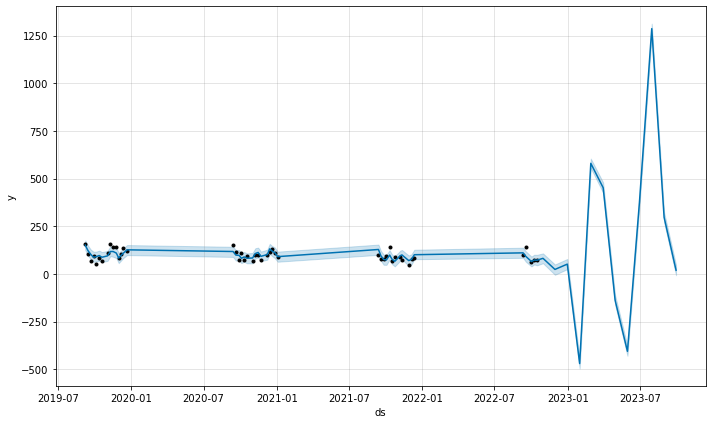

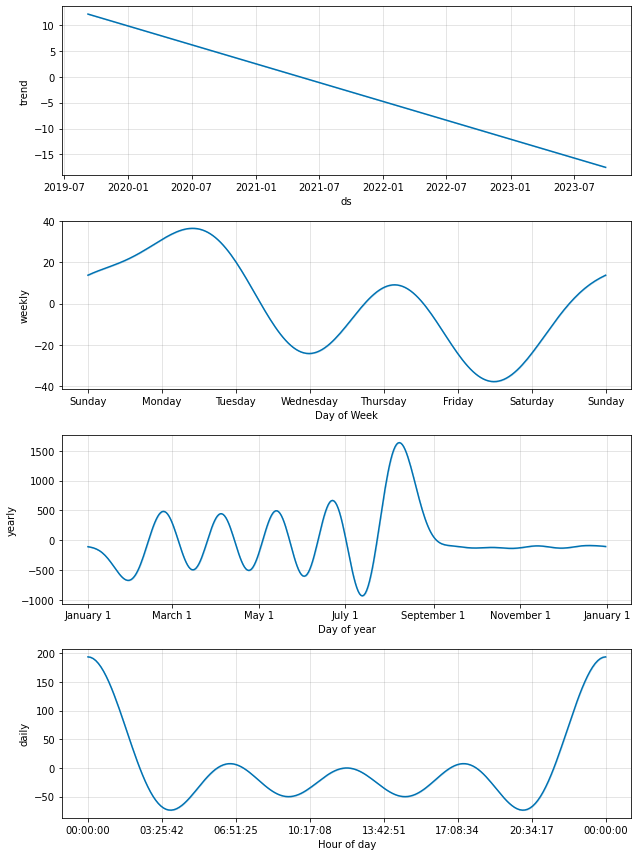

In [9]:
p = Prophet(interval_width=0.8, daily_seasonality=True)
model = p.fit(passer_rating_df)

future = p.make_future_dataframe(periods= 12, freq='M')
forecast_prediction = p.predict(future)
plot1 = p.plot(forecast_prediction)
plot2 = p.plot_components(forecast_prediction)

print("Lamar Jackson's passer rating forecast")